First, we will start loading the data to have an overiview of the content and what is within it.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

observations = pd.read_csv('observations.csv')

observations.info()

observations['observations'].describe()
observations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


<Figure size 700x300 with 0 Axes>

<Figure size 700x300 with 0 Axes>

In [10]:
species = pd.read_csv('species_info.csv')

species.info()
species.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## Analysis

### What is the distribution of conservation_status for animals?

<Axes: xlabel='conservation_status', ylabel='Count'>

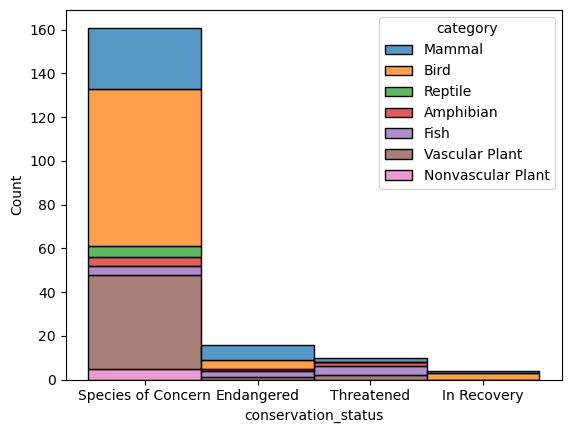

In [15]:
sns.histplot(x=species['conservation_status'], hue=species['category'], multiple='stack')

### Are certain types of species more likely to be endangered?

<Axes: xlabel='category', ylabel='Count'>

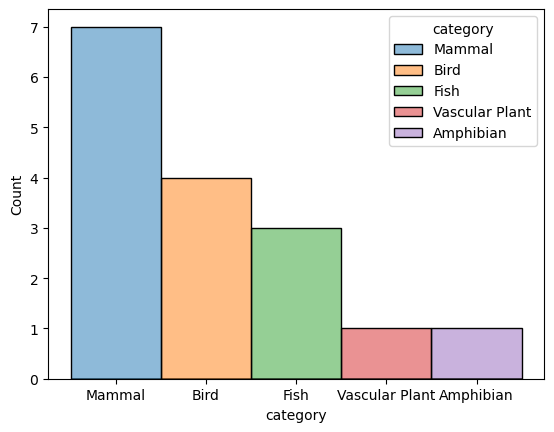

In [18]:
endangered = species[species['conservation_status']=='Endangered']

endangered.head()

sns.histplot(x=endangered['category'], hue=endangered['category'])

### Are the differences between species and their conservation status significant?

### Which species were spotted the most at each park?

<Axes: xlabel='category', ylabel='observations'>

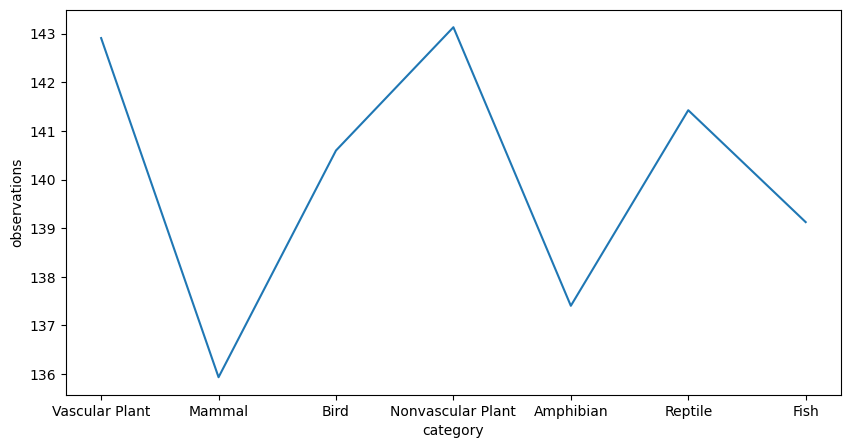

In [47]:
# num_of_species_observation = observations.scientific_name.nunique()
# num_of_species_species = species.scientific_name.nunique()

# print(num_of_species_observation)
# print(num_of_species_species)

complete_df = pd.merge(observations, species)
complete_df.head()

plt.figure(figsize=(10, 5))
sns.lineplot(x='category', y='observations', data=complete_df, errorbar=None)